# Load data

In [3]:
import pandas as pd

In [6]:
df = pd.read_csv('../data/fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [10]:
df.size

321840

In [11]:
df.shape

(17880, 18)

In [ ]:
df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64


In [13]:
df['fraudulent'].value_counts(normalize=True)

fraudulent
0    0.951566
1    0.048434
Name: proportion, dtype: float64

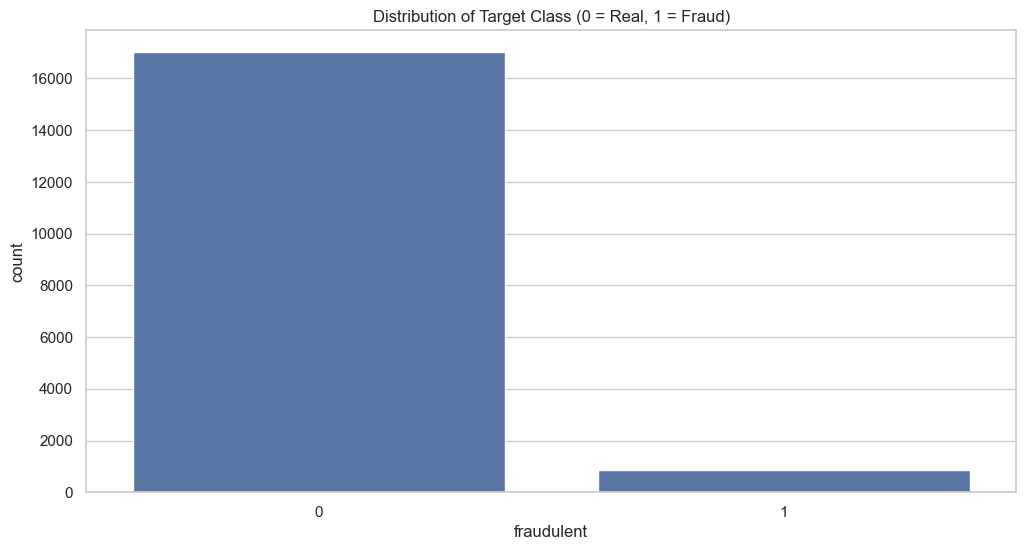


🚫 Columns with missing values:
salary_range           15012
department             11547
required_education      8105
benefits                7212
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2696
location                 346
description                1
dtype: int64


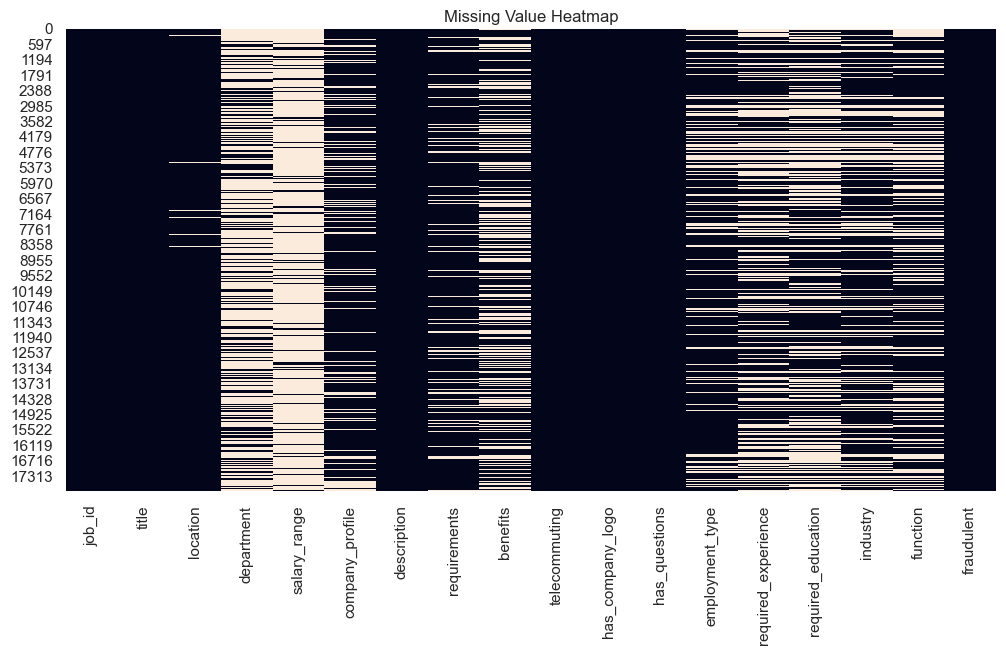


📊 employment_type value counts:
employment_type
Full-time    11620
NaN           3471
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64


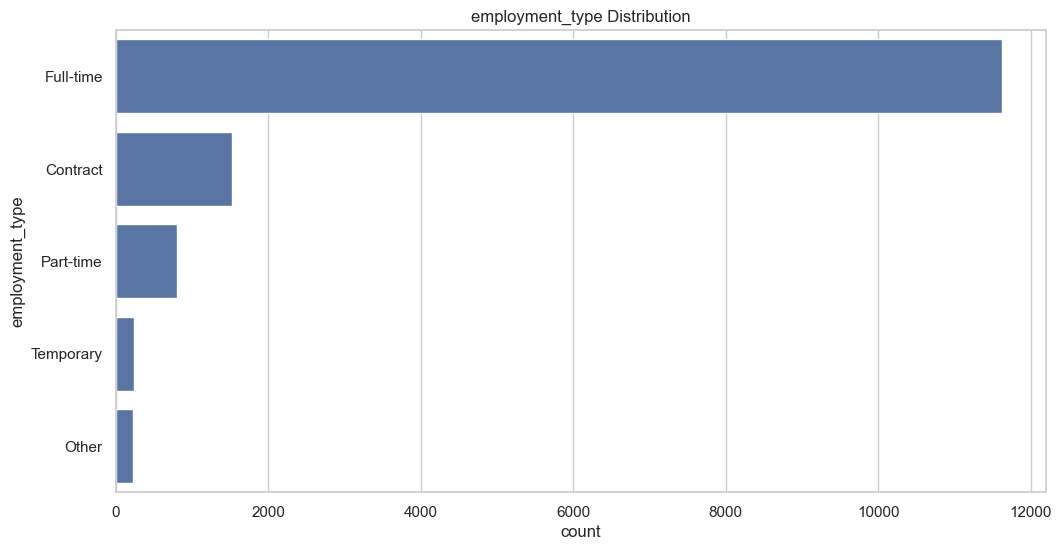


📊 required_experience value counts:
required_experience
NaN                 7050
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: count, dtype: int64


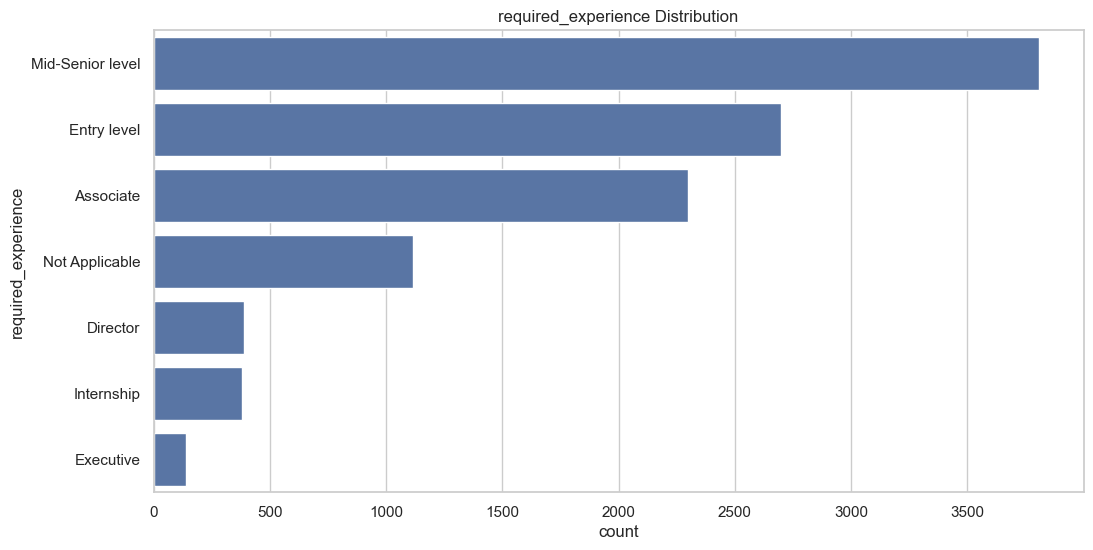


📊 required_education value counts:
required_education
NaN                                  8105
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: count, dtype: int64


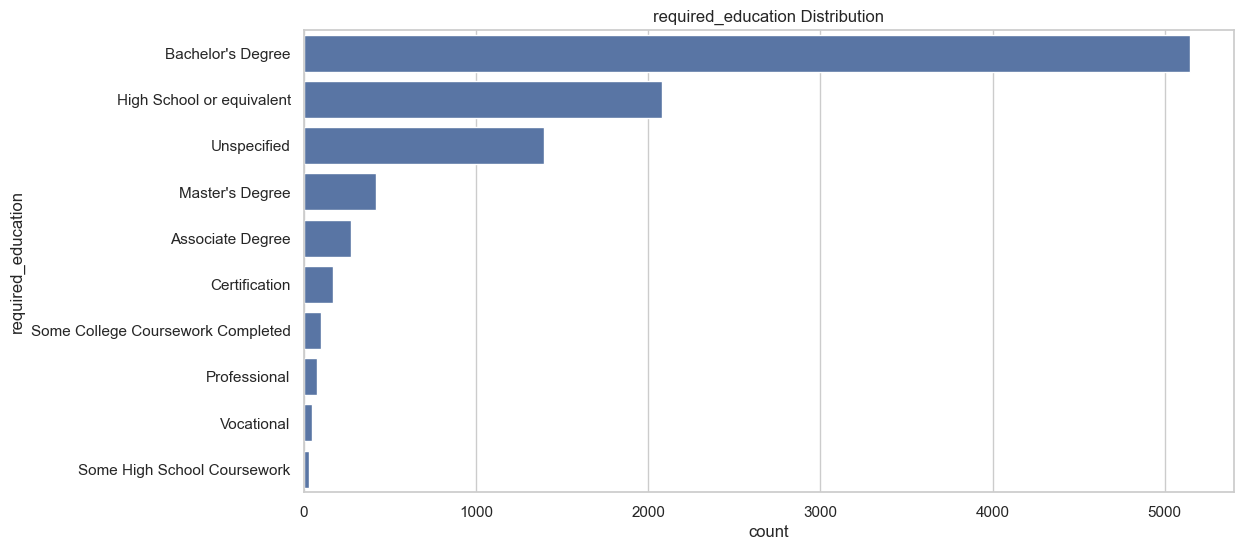


📊 industry value counts:
industry
NaN                                    4903
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: count, Length: 132, dtype: int64


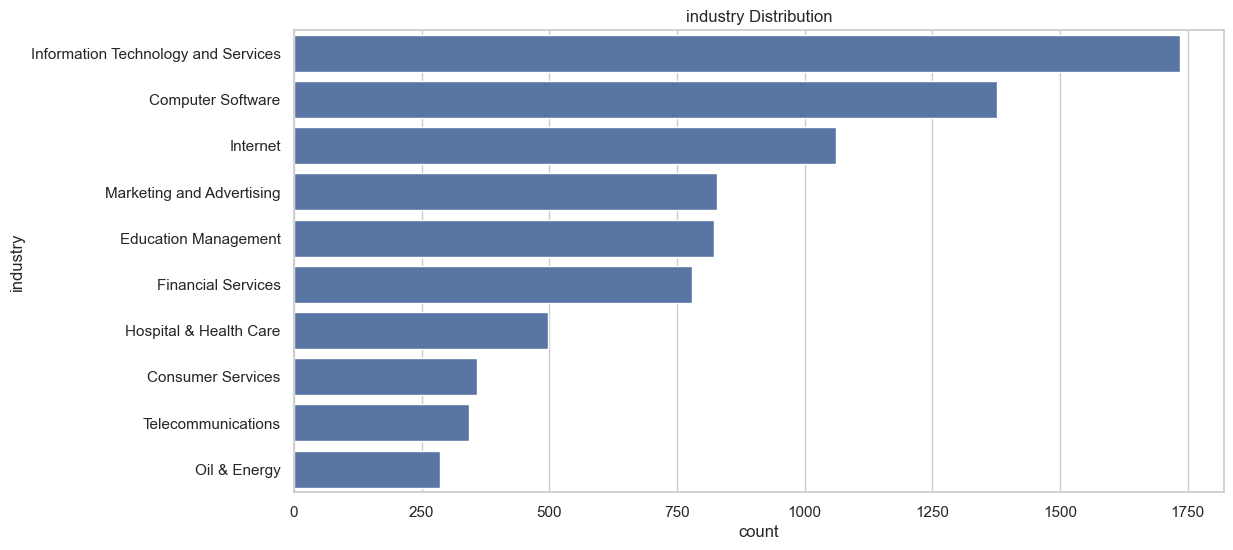


📊 function value counts:
function
NaN                       6455
Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Stra

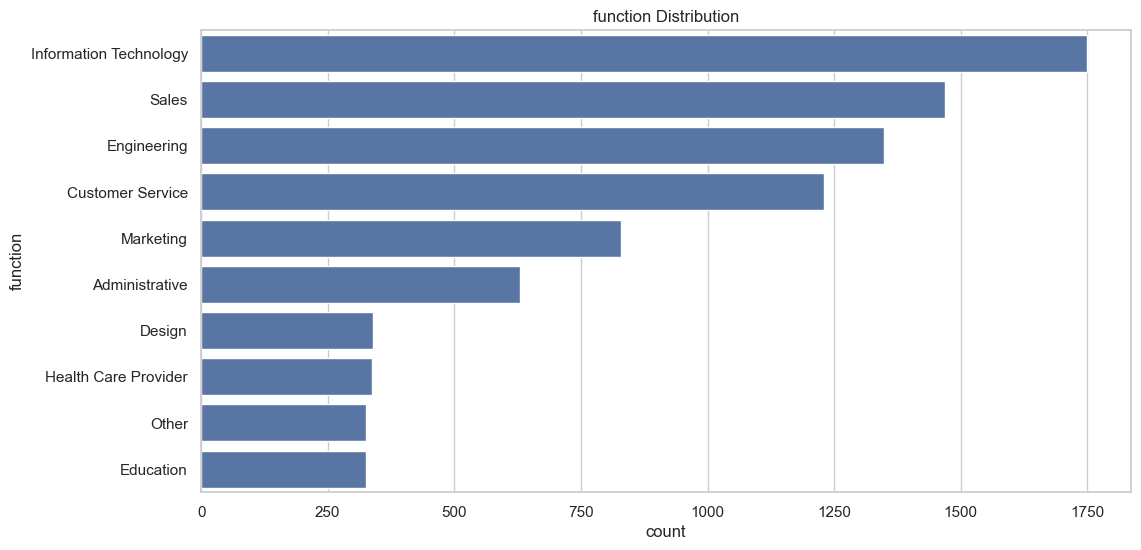

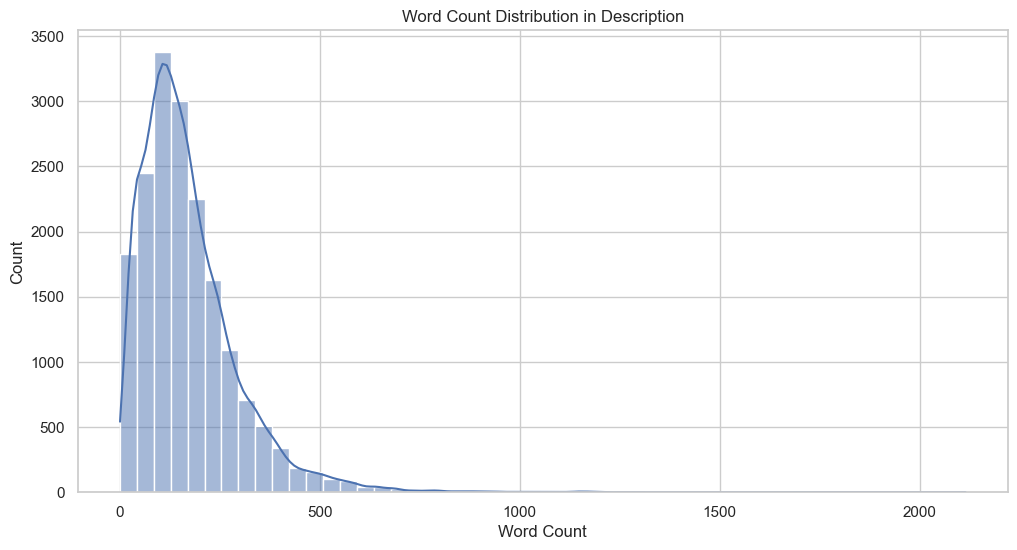

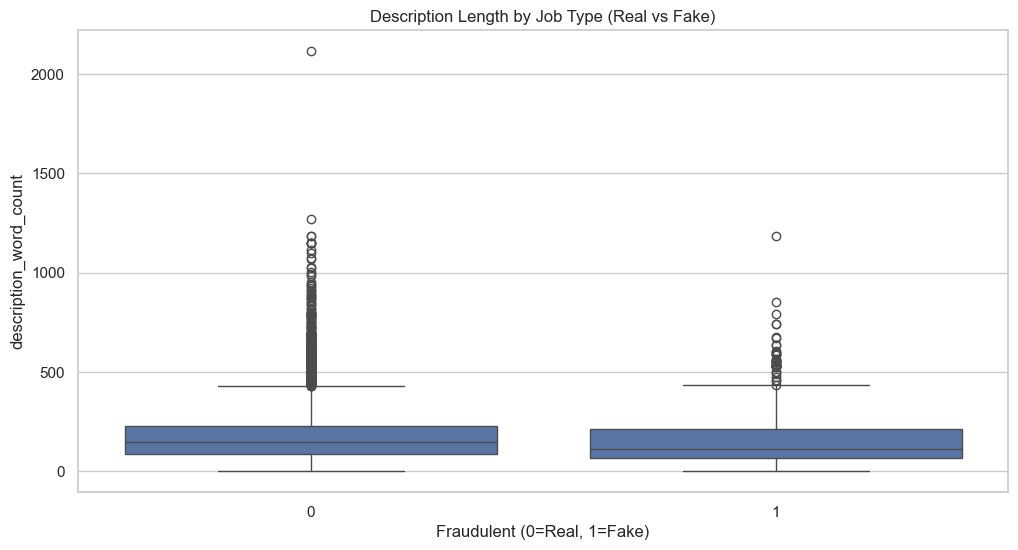

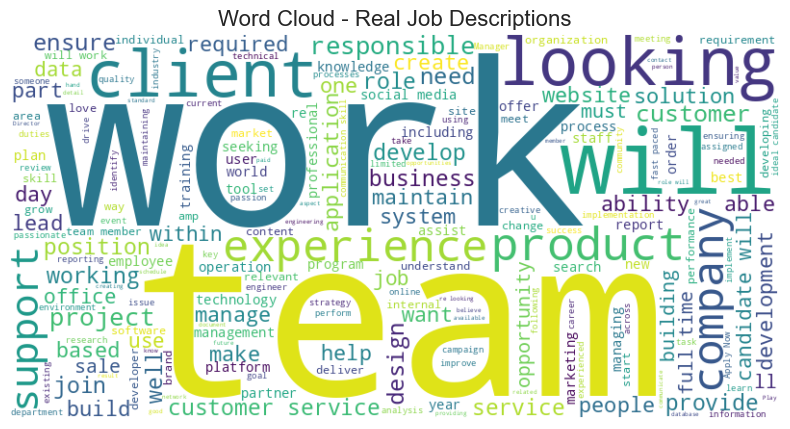

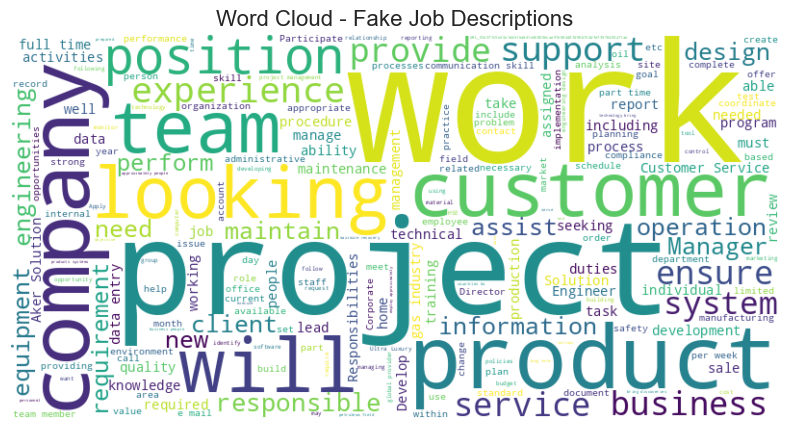

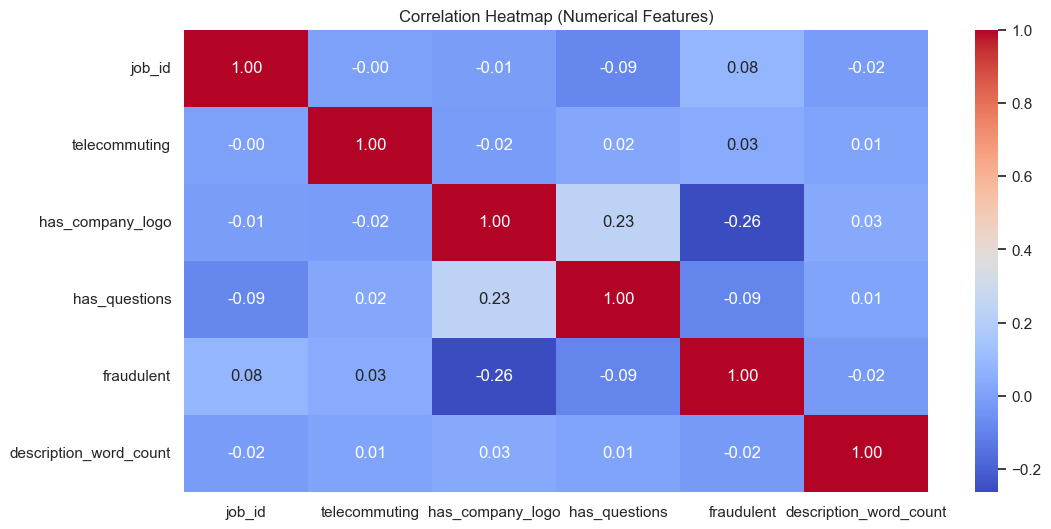

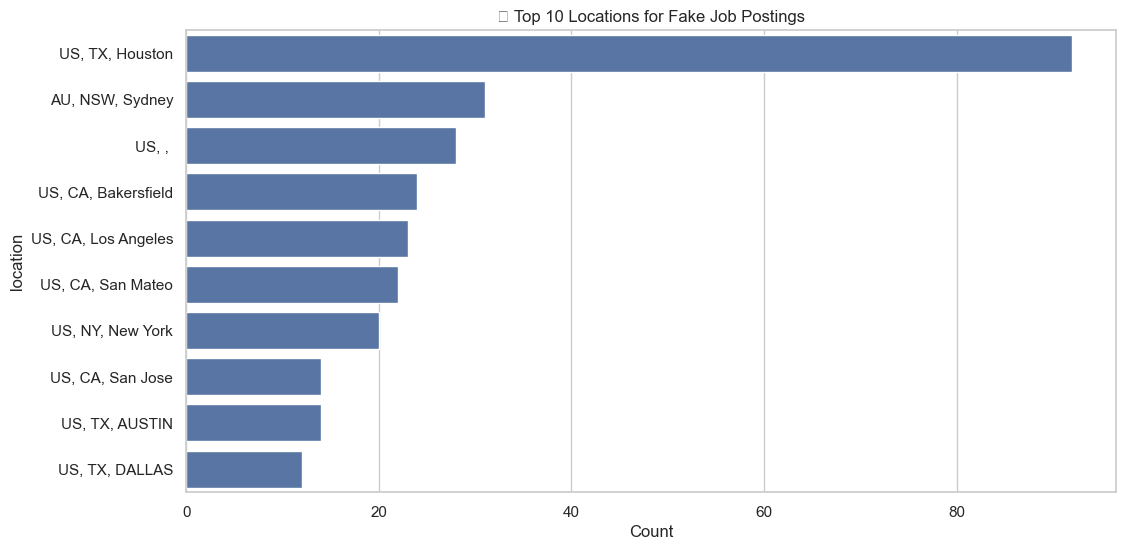

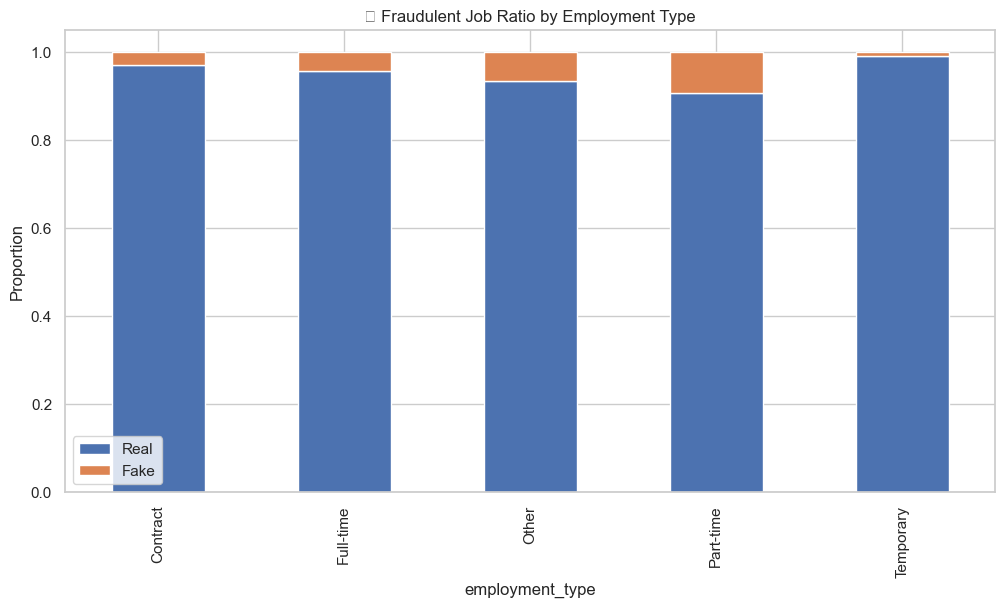

In [16]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)



sns.countplot(x='fraudulent', data=df)
plt.title("Distribution of Target Class (0 = Real, 1 = Fraud)")
plt.show()

# Check for missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("\n🚫 Columns with missing values:")
print(missing)

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

# Unique values in categorical columns
categorical_cols = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']
for col in categorical_cols:
    print(f"\n📊 {col} value counts:")
    print(df[col].value_counts(dropna=False))
    sns.countplot(y=col, data=df, order=df[col].value_counts().iloc[:10].index)
    plt.title(f"{col} Distribution")
    plt.show()

# Word count in description
df['description_word_count'] = df['description'].fillna("").apply(lambda x: len(x.split()))
sns.histplot(df['description_word_count'], bins=50, kde=True)
plt.title("Word Count Distribution in Description")
plt.xlabel("Word Count")
plt.show()

# Compare average word count for real vs fake
sns.boxplot(x='fraudulent', y='description_word_count', data=df)
plt.title("Description Length by Job Type (Real vs Fake)")
plt.xlabel("Fraudulent (0=Real, 1=Fake)")
plt.show()

# WordClouds for descriptions
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# WordCloud: Real Jobs
real_text = df[df['fraudulent'] == 0]['description'].dropna()
generate_wordcloud(real_text, "Word Cloud - Real Job Descriptions")

# WordCloud: Fake Jobs
fake_text = df[df['fraudulent'] == 1]['description'].dropna()
generate_wordcloud(fake_text, "Word Cloud - Fake Job Descriptions")

# Correlation matrix for numerical fields
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# Top locations with most fake job postings
top_locations = df[df['fraudulent'] == 1]['location'].value_counts().nlargest(10)
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title("📍 Top 10 Locations for Fake Job Postings")
plt.xlabel("Count")
plt.show()

# Ratio of fake postings by employment type
fake_employment = pd.crosstab(df['employment_type'], df['fraudulent'], normalize='index')
fake_employment.plot(kind='bar', stacked=True)
plt.title("📌 Fraudulent Job Ratio by Employment Type")
plt.ylabel("Proportion")
plt.legend(["Real", "Fake"])
plt.show()
